In [15]:
# import libraries
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

##### Fetching the all crypto currency latest price data from coinmarket api

In [214]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c6d563eb-5020-4805-822e-422c3a9b018c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
# storing jason to Dict
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

##### Parsing  nested Json data into  Dataframe

In [215]:
# crearted the list
cryptodata = data['data']
#cryptodata[0]

In [224]:
# Format data into a more readable format
# parsing the nested Jason data present in quote collumns and creating datafrane for data preparation requirment
rows=[]
for currency in cryptodata:
    currency_id = currency['id']
    slug = currency['slug']
    cmc_rank = currency['cmc_rank']
    total_supply = currency['total_supply']
    currency_name = currency['name']
    currency_symbol = currency['symbol']
    currenct_price = currency['quote']['USD']['price']
    last_updated = currency['quote']['USD']['last_updated']
    rows.append([currency_id, slug, currency_name , currency_symbol, cmc_rank, currenct_price, total_supply,last_updated])
# Created new Dataframe which contains required price quote columns
df_parse_nested_json = pd.DataFrame(rows, columns=["currency_id", "slug", "currency_name", "currency_symbol", "cmc_rank", "currency_price", "total_supply", "last_updated"])
# Display the new df data
df_parse_nested_json1 = pd.DataFrame(df_parse_nested_json, columns = ['slug', 'currency_symbol'])
df_parse_nested_json1.to_csv(r'C:/Users/dell/Documents/docker/File Name.csv')

In [225]:
df_parse_nested_json1

,slug,currency_symbol
0,bitcoin,BTC
1,ethereum,ETH
2,cardano,ADA
3,binance-coin,BNB
4,tether,USDT
...,...,...
95,okb,OKB
96,iostoken,IOST
97,nexo,NEXO
98,renbtc,RENBTC


In [ ]:
df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')

In [127]:
#Replace Headers, updating columns name in uppercase
df_crypto_price = df_parse_nested_json.rename(columns=str.upper)
df_crypto_price.head()

,CURRENCY_ID,SLUG,CURRENCY_NAME,CURRENCY_SYMBOL,CMC_RANK,CURRENCY_PRICE,TOTAL_SUPPLY,LAST_UPDATED
0,1,bitcoin,Bitcoin,BTC,1,55357.363622,1.884008e+07,2021-10-10T19:48:02.000Z
1,1027,ethereum,Ethereum,ETH,2,3525.624028,1.178728e+08,2021-10-10T19:48:02.000Z
2,2010,cardano,Cardano,ADA,3,2.238177,3.311762e+10,2021-10-10T19:47:10.000Z
3,1839,binance-coin,Binance Coin,BNB,4,415.785252,1.681370e+08,2021-10-10T19:47:08.000Z
4,825,tether,Tether,USDT,5,0.999897,7.138568e+10,2021-10-10T19:47:09.000Z


In [182]:
# import library to open urls and download htmls
# print out python data structures
from pprint import pprint
# for parsing all the tables present
# on the website
import urllib.request
from html_table_parser.parser import HTMLTableParser
# for converting the parsed data to pandas dataframe
from bs4 import BeautifulSoup

In [184]:
def url_load_html(url):
    # request to the website
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)
    # reading contents of the website
    return f.read()

In [194]:
# defining the html contents of a URL.
#Products Exports, Imports, Tariffs by country & region 2019 _ WITS Data.html
xhtml = url_load_html('https://www.moneycontrol.com/stocks/marketstats/fii_dii_activity/index.php').decode('utf-8')
# Defining the HTMLTableParser object
par = HTMLTableParser()
# feeding the html contents in the
# HTMLTableParser object
par.feed(xhtml)

In [211]:
# Now finally obtaining the data of the table required from html file
#pprint(par.tables[4])
# converting the parsed web table data to dataframe
df_html_data = pd.DataFrame(par.tables[4])
df_html_data.head()

,0,1,2,3,4,5,6
0,,FII Rs Crores,DII Rs Crores,None,None,None,None
1,Date,Gross Purchase,Gross Sales,Net Purchase / Sales,Gross Purchase,Gross Sales,Net Purchase / Sales
2,September 2021 September 2021,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
3,August 2021 August 2021,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
4,July 2021 July 2021,"125,896.68","149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"


In [ ]:
##Data Source : https://www.kaggle.com/danielbethell/adult-incomes-in-the-united-states
# crypto_income for adult, updated the dataset by adding additional columns crypto_slang & crypto symbol

Dataset columns details:
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
crypto_slang: 20 crypto currencires name like bitcoins
crypto_symbol:

In [269]:
# read source file into dataframe
crypto_income_df = pd.read_csv("C:/Users/dell/Documents/docker/crypto_income_data.txt", sep="|")
# display firt 5 records
crypto_income_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,total-income,crypto_slang,crypto_symbol
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,2174,0,40,United-States,<=50K,bitcoin,BTC
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,13,United-States,<=50K,ethereum,ETH
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,Male,0,0,40,United-States,<=50K,cardano,ADA
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Male,0,0,40,United-States,<=50K,binance-coin,BNB
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Female,0,0,40,Cuba,<=50K,tether,USDT


In [270]:
# Headers, updating columns name in uppercase
crypto_income_df = crypto_income_df.rename(columns=str.upper)
crypto_income_df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,RELATIONSHIP,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,TOTAL-INCOME,CRYPTO_SLANG,CRYPTO_SYMBOL
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,2174,0,40,United-States,<=50K,bitcoin,BTC
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,13,United-States,<=50K,ethereum,ETH
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,Male,0,0,40,United-States,<=50K,cardano,ADA
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Male,0,0,40,United-States,<=50K,binance-coin,BNB
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Female,0,0,40,Cuba,<=50K,tether,USDT


In [278]:
# renaming the columns names
crypto_income_df2 = crypto_income_df.rename(columns={"EDUCATION-NUM":"EDUCATION_NUM", "CAPITAL-GAIN":"CAPITAL_GAIN", "HOURS-PER-WEEK":"HOURS_PER_WEEK", "NATIVE-COUNTRY":"NATIVE_COUNTRY", "TOTAL-INCOME":"TOTAL_INCOME"})

In [280]:
crypto_income_df2.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARITAL-STATUS,RELATIONSHIP,SEX,CAPITAL_GAIN,CAPITAL-LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,TOTAL_INCOME,CRYPTO_SLANG,CRYPTO_SYMBOL
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,2174,0,40,United-States,<=50K,bitcoin,BTC
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,13,United-States,<=50K,ethereum,ETH
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,Male,0,0,40,United-States,<=50K,cardano,ADA
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Male,0,0,40,United-States,<=50K,binance-coin,BNB
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Female,0,0,40,Cuba,<=50K,tether,USDT


In [261]:
#5. Look at summary information about your data (total, mean, min, max,␣
#freq, unique, etc.) Does this present any more questions for you? Does it␣
#lead you to a conclusion yet?
print("\nDescribe Data\n")
print(crypto_income_df.describe())
print("\nSummarized Data\n")
print(crypto_income_df.describe(include=['O']))


Describe Data

                AGE        FNLWGT  EDUCATION-NUM  CAPITAL-GAIN  CAPITAL-LOSS  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       HOURS-PER-WEEK  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Summarized Data

       WORKCLASS EDUCATION   

In [282]:
# find out the null present in required columns
print(f"is null is present in AGE -- {crypto_income_df.AGE.isnull().values.any()}")
print(f"is null is present in CRYPTO_SYMBOL -- {crypto_income_df.CRYPTO_SYMBOL.isnull().values.any()}")
print(f"is null is present in CRYPTO_SLANG -- {crypto_income_df.CRYPTO_SLANG.isnull().values.any()}")
print(f"is null is present in CAPITAL_GAIN -- {crypto_income_df2.CAPITAL_GAIN.isnull().values.any()}")

is null is present in AGE -- False
is null is present in CRYPTO_SYMBOL -- False
is null is present in CRYPTO_SLANG -- False
is null is present in CAPITAL_GAIN -- False


In [284]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
df_crypto_price['name_from_df2'] = df_crypto_price['CURRENCY_NAME'].apply(lambda x: process.extractOne(x, crypto_income_df2['CRYPTO_SLANG'].to_list(),score_cutoff=80))
name_from_df2_list = df_crypto_price['name_from_df2'].to_list()
name_from_df2_list = [_[0] if _ != None else None for _ in name_from_df2_list]
df_crypto_price['name_from_df2'] = name_from_df2_list

df_crypto_price = df_crypto_price.merge(crypto_income_df2, left_on = 'name_from_df2', right_on = 'CRYPTO_SLANG', suffixes=('','_2'))
df_crypto_price.drop(['CURRENCY_NAME','name_from_df2'],axis=1, inplace=True)

In [288]:
# identifying outliers
# load libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x1b66f772280>,
 'caps': [<matplotlib.lines.Line2D at 0x1b66f772940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b66f0cdee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b66f77d040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b66f77d3a0>],
 'means': []}

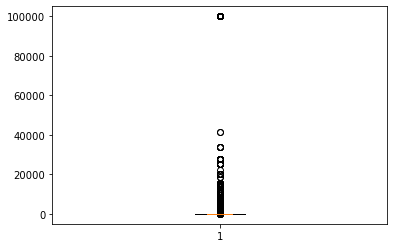

In [291]:
#plot boxplot to find outliers data
plt.boxplot(crypto_income_df2.CAPITAL_GAIN, notch=True)

In [292]:
# fixing outliers 
crypto_income_df2_fix = crypto_income_df2[(crypto_income_df2['CAPITAL_GAIN'] <= 60000) & (crypto_income_df2['CAPITAL_GAIN'] >= 1)]

In [294]:
# new shape of dh after fixing outliers
crypto_income_df2_fix.shape

(2553, 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b66f82a790>,
 'caps': [<matplotlib.lines.Line2D at 0x1b66f82ae50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b66f82a400>],
 'medians': [<matplotlib.lines.Line2D at 0x1b66f846550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b66f8468b0>],
 'means': []}

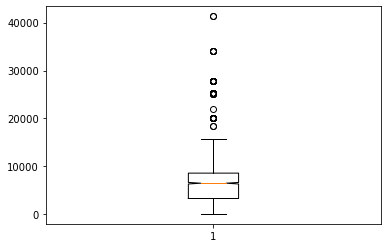

In [295]:
# plot after fixing outliers
#plot boxplot to after fixing outliers data
plt.boxplot(crypto_income_df2_fix.CAPITAL_GAIN, notch=True)